In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
import numpy as np

In [2]:
sp500 = yf.download('^GSPC', start='2019-05-25', end='2022-11-30', interval='1d', prepost=False, threads=True)
sp500 = sp500.loc[:, 'Close']  # get adjusted close only
sp500 = sp500.pct_change().dropna()
sp500_np = np.cumprod(1 + sp500.values) - 1
sp500 = pd.DataFrame(sp500_np, index=sp500.index)

[*********************100%***********************]  1 of 1 completed


In [3]:
returns = pd.read_csv('portfolio_report.csv', index_col=0, parse_dates=True)
def pct_to_abs(row):
    return float(str(row['Portfolio 1']).rstrip('%')) / 100
returns = returns.apply(pct_to_abs, axis=1)

In [4]:
returns

Date
2019-05-27    0.004660
2019-05-28    0.002923
2019-05-29   -0.001859
2019-05-30    0.002271
2019-05-31   -0.001863
                ...   
2022-11-23    0.680628
2022-11-24    0.681498
2022-11-25    0.683861
2022-11-28    0.688298
2022-11-29    0.707942
Length: 919, dtype: float64

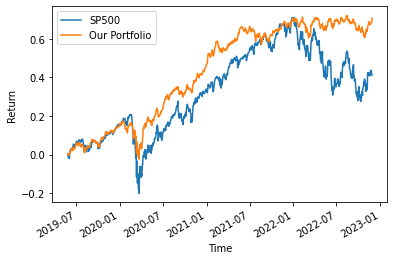

In [7]:
sp500.plot()
returns.plot()
plt.ylabel('Return')
plt.xlabel('Time')
plt.legend(['SP500', 'Our Portfolio'])
plt.savefig('Return_VS_SP500.png', dpi=400)